# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_count = len(merge_df["Mouse ID"].unique())
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicateRows.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaneddf = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(cleaneddf["Mouse ID"].unique())
mice_count

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = cleaneddf.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = cleaneddf.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = cleaneddf.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = cleaneddf.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = cleaneddf.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

combineddf = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
                           "Tumor Volume Variance	": var, "Tumor Volume Std. Dev.": std, "Tumor Volume Std. Err.": sem})
combineddf

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance\t,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

cleaneddf.groupby('Drug Regimen', as_index=False)['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

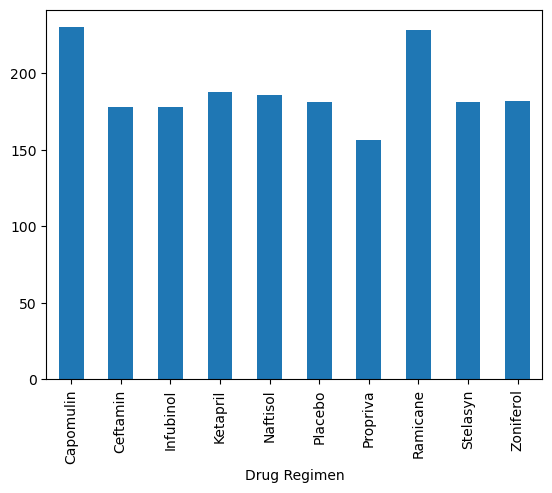

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timesum = cleaneddf.groupby('Drug Regimen')['Timepoint'].count()
ax = timesum.plot.bar(x='Drug Regimen', y='Timepoint')


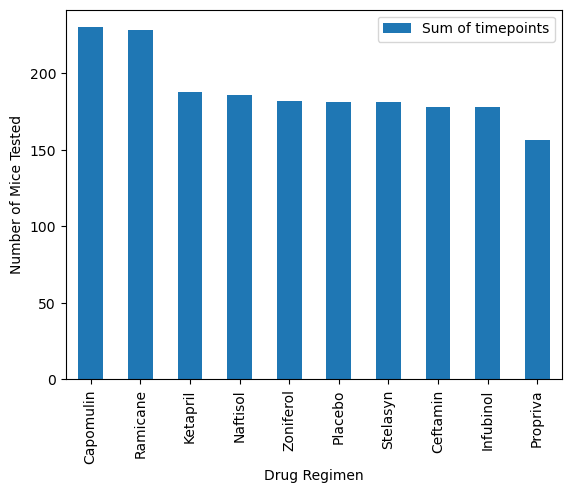

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timesum = cleaneddf.groupby('Drug Regimen')['Timepoint'].count()
chartdf = pd.DataFrame({"Sum of timepoints": timesum})
chartdf = chartdf.sort_values('Sum of timepoints', ascending=False)

figure1 = chartdf.plot(kind="bar",
                                xlabel="Drug Regimen",
                                ylabel="Number of Mice Tested")

# Show plot
plt.show()

<AxesSubplot:>

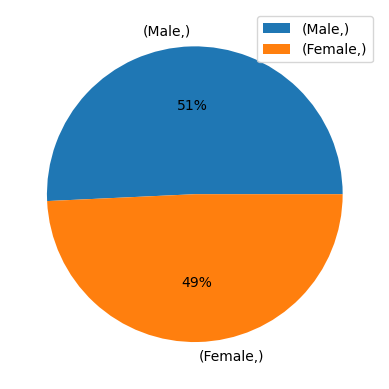

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

df = pd.DataFrame(cleaneddf, columns = ['Sex'])
df.value_counts(normalize=True).plot.pie(autopct='%1.f%%', ylabel='', legend=True)


([<matplotlib.patches.Wedge at 0x1ccb0c668e0>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')],
 [Text(-0.013976124569910401, 0.5998372011987972, '51%'),
  Text(0.01397606840909865, -0.5998372025073339, '49%')])

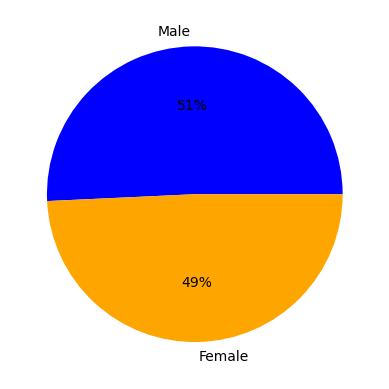

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

malesum = cleaneddf['Sex'].value_counts()['Male']

femalesum = cleaneddf['Sex'].value_counts()['Female']


# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [malesum, femalesum]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.f%%")

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
cleaned_gp = cleaneddf.groupby(['Mouse ID'])['Timepoint'].max()
cleaned_gp

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergedtimedf = pd.merge(cleaned_gp, cleaneddf, on=['Mouse ID','Timepoint'],how="left")
mergedtimedf

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [68]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumorvoldata_df = pd.DataFrame()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
quartiles = mergedtimedf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Tumor Volumes is: {lowerq}")
print(f"The upper quartile of Tumor Volumes is: {upperq}")
print(f"The interquartile range of Tumor Volumes is: {iqr}")
print(f"The the median of Tumor Volumes is: {quartiles[0.5]} ")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volumes is: 45.93471217
The upper quartile of Tumor Volumes is: 64.95756185
The interquartile range of Tumor Volumes is: 19.022849680000007
The the median of Tumor Volumes is: 55.84141007 
Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


Text(0, 0.5, 'Tumor Volume (mm3)')

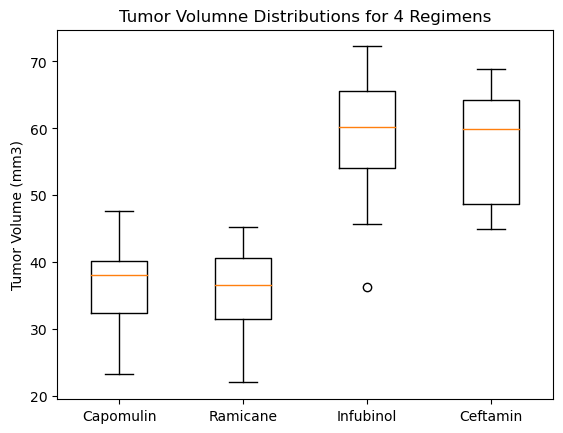

In [74]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

capomulin = mergedtimedf[mergedtimedf['Drug Regimen'] == 'Capomulin']
capomulin_vol = capomulin['Tumor Volume (mm3)']
ramicane = mergedtimedf[mergedtimedf['Drug Regimen'] == 'Ramicane']
ramicane_vol = ramicane['Tumor Volume (mm3)']
infubinol = mergedtimedf[mergedtimedf['Drug Regimen'] == 'Infubinol']
infubinol_vol = infubinol['Tumor Volume (mm3)']
ceftamin = mergedtimedf[mergedtimedf['Drug Regimen'] == 'Ceftamin']
ceftamin_vol = ceftamin['Tumor Volume (mm3)']


plt.boxplot([capomulin_vol, ramicane_vol, infubinol_vol, ceftamin_vol], labels=treatments)
plt.title('Tumor Volumne Distributions for 4 Regimens')
plt.ylabel('Tumor Volume (mm3)')


## Line and Scatter Plots

In [78]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


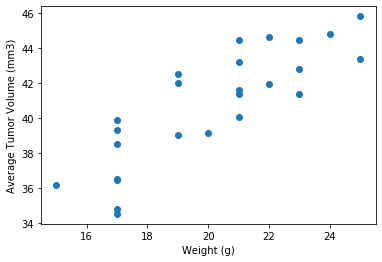

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


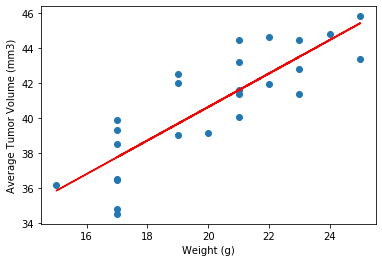

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

